<a href="https://colab.research.google.com/github/jcbalanta/ISYS5002_2024-S2_A1_21985382_Juan-Camilo-Balanta/blob/main/Assigment_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Solving Methodology**

**1. Problem Stament**

The goal is to develop an application that predicts the likelihood of a heart condition based on user inputs such as age, gender, BMI category, smoking status, alcohol consumption status, and physical activity status. The application should also store the data in a CSV file and be able to generate visual graphs based on this data. A predefined risk assessment matrix will be used to predict the risk of a heart condition.

**2. Describe the inputs and outputs:**

**Inputs:** The user-provided data includes:
Age (integer).

Gender (string).

Height (floating-point number in centimeters).

Weight (floating-point number in kilograms).

Smoking status (string: Smoker/Non-smoker).

Alcohol consumption status (string: Drinker/Non-drinker).

Physical activity status (string: Active/Inactive).

**Outputs:**
Calculated BMI (floating-point number).

BMI category (string).

Heart condition risk level (string).

CSV file containing all the above data.

Visual graphs representing heart condition risk based on this data.

**3.Solve a simple example by hand:**

Consider an example where a user enters the following data:

Age: 45 years,

Gender: Male,

Height: 175 cm,

Weight: 80 kg,

Smoking status: Smoker,

Alcohol consumption status: Drinker,

Physical activity status: Active,

BMI Calculation:

Height converted to meters: 175 cm → 1.75 m

BMI = Weight / (Height²) = 80 / (1.75²) ≈ 26.12

BMI Category: Overweight.

According to the risk assessment matrix, if the user is overweight and a smoker, their risk is High.

**4.Develop an algorithm or pseudocode:**

Prompt the user to enter their age, gender, height, weight, smoking status, alcohol consumption status, and physical activity status.

Calculate the BMI using the provided height and weight.

Compare the calculated BMI with predefined ranges to determine the BMI category.

Use a risk assessment matrix to determine the risk level based on the BMI

 category, smoking status, alcohol consumption, and physical activity.

Store the data in a CSV file.

Generate graphs based on the stored data.

**5.Convert pseudocode into Python code:**

Installing required libraries

In [ ]:
!pip install pandas numpy matplotlib


In [27]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import csv

**Rquest User Data**

In this project, I chose a user-friendly approach to data collection. I guided the user through multiple questions, validated the data in real time, and allowed them to confirm or re-enter the information if necessary. This approach ensures that the user is actively involved in verifying their inputs, which helps reduce errors. I used a dictionary structure to consolidate the validated entries because it provides clarity and simplicity when accessing the data during subsequent steps, such as BMI calculation and risk assessment. The step-by-step confirmation also ensures the accuracy of the data before it is processed and stored.

I chose the dictionary as the data structure because it allows me to store information in key-value pairs, making it easy to organize and access individual pieces of data using clear labels like 'Age', 'Gender', and 'BMI'. Each piece of information provided by the user, such as age, gender, and health status, is stored with a descriptive key, making the data more readable and easier to retrieve for any subsequent processing or analysis. In this case, all the information is stored in a dictionary called **user_data**, which keeps everything well-organized and ready for use.

To calculate the Body Mass Index (BMI) and categorize it, I implemented comparison operations that help classify the BMI into different ranges. First, the BMI is calculated by dividing weight in kilograms by the square of height in meters. Then, comparisons are used to determine the corresponding category: if the BMI is less than 18.5, it is classified as 'underweight'; if it is between 18.5 and 24.9, it is classified as 'normal weight'; if it is between 25 and 29.9, it is classified as 'overweight'; and if it is 30 or more, it is classified as 'obesity'. These comparisons allow for a clear interpretation of the BMI and provide an accurate assessment of weight-related health status.

The formula for calculating Body Mass Index (BMI) and establishing weight categories based on BMI was taken from the following **website: CDC - Assessing Adult BMI.**

The **get_user_input** function collects and validates personal health data from the user through a series of prompts. It begins by asking for the user's age and gender, confirming the accuracy of this information before proceeding. It then gathers height and weight, ensuring these are positive numbers, and confirms their correctness. The function further collects information on smoking status, alcohol consumption, and physical activity level, validating each input. With all data confirmed, it calculates the Body Mass Index (BMI) and classifies it into categories like underweight, normal weight, overweight, or obesity. The results, along with all collected data, are stored in a dictionary and returned for further use.

**Challenges:**

When writing this function, I faced several challenges, including indentation issues, validating each input, and the need to provide clear error messages so that users could correct their responses. I also had to establish the proper logic and structure of the function and finally consolidate all the information into a dictionary. To overcome these challenges, I used class recordings, my notes, YouTube videos, and ChatGPT's assistance.

In [26]:
def get_user_input():
    while True:
        try:
            # Ask for user input age and gender

            age = int(input("Enter your age: "))
            gender = input("Gender (Male/Female): ").strip().upper()

            # Display the entered values
            print(f"You entered: Age={age}, Gender={gender}")

            # Confirm the entered values
            confirm = input("Is this information correct? (Yes/No): ").strip().lower()

            if confirm in ['yes', 'y']:
                # Exit the loop if the information is correct
                break
            elif confirm in ['no', 'n']:
                print("Please re-enter the information.")
            else:
                print("Invalid response. Please enter 'Yes' or 'No'.")
        except ValueError:
            print("Invalid input. Please enter a valid number for age.")

    # Provide final confirmation after the loop
    print(f"Final entry: Age={age}, Gender={gender}")

    # Get the values of Height and Weight
    while True:
        try:
            # Get user height input
            height_cm = float(input("Enter your height in cms: "))
            if height_cm <= 0:
                print("Height must be a positive number.")
                continue

            # Get user weight input
            weight_kg = float(input("Enter your weight in Kgs: "))
            if weight_kg <= 0:
                print("Weight must be a positive number.")
                continue

        except ValueError:
            print("Please enter valid numbers for height and weight.")
            continue

        # Display the entered values
        print(f"You entered: Height={height_cm} cm, Weight={weight_kg} kg")

        # Confirm the entered values
        confirmation = input("Are these values correct? (yes/no): ").strip().lower()

        if confirmation in ['yes', 'y']:
            break  # Exit the loop if the information is correct
        elif confirmation in ['no', 'n']:
            print("Please re-enter the information.")
        else:
            print("Invalid response. Please enter 'yes' or 'no'.")

    # This line will only be executed after the loop is exited, when the information is confirmed.
    print(f"Final entry: Height={height_cm} cm, Weight={weight_kg} kg")

    # Gen AI Interaction - Verify smoking status
    while True:
        # Ask for smoking status
        smoking_status = input("What is your smoking status? (Smoker/Non-Smoker): ").strip().upper()

        # Validate the status
        if smoking_status not in ["SMOKER", "NON-SMOKER"]:
            print("Invalid smoking status. Please enter 'Smoker' or 'Non-Smoker'.")
        else:
            # Provide appropriate feedback
            print(f"You indicated that you {'smoke' if smoking_status == 'SMOKER' else 'do not smoke'}.")
            break  # Exit the loop if the input is valid

    # Gen AI Interaction - Verify alcohol consumption status
    while True:
        # Ask for alcohol consumption status
        alcohol_status = input("What is your alcohol consumption status? (Drinker/Non-Drinker): ").strip().upper()

        # Validate the status
        if alcohol_status not in ["DRINKER", "NON-DRINKER"]:
            print("Invalid alcohol consumption status. Please enter 'Drinker' or 'Non-Drinker'.")
        else:
            # Provide appropriate feedback
            print(f"You indicated that you {'drink' if alcohol_status == 'DRINKER' else 'do not drink'}.")
            break  # Exit the loop if the input is valid

    # Gen AI Interaction - Verify physical activity status
    while True:
        # Ask for physical activity status
        physical_activity_status = input("What is your physical activity status? (Active/Inactive): ").strip().upper()

        # Validate the status
        if physical_activity_status not in ["ACTIVE", "INACTIVE"]:
            print("Invalid physical activity status. Please enter 'Active' or 'Inactive'.")
        else:
            # Provide appropriate feedback
            print(f"You indicated that you are {'active' if physical_activity_status == 'ACTIVE' else 'inactive'}.")
            break  # Exit the loop if the input is valid

    # Calculate BMI
    height_m = height_cm / 100
    bmi = weight_kg / (height_m ** 2)

    # Determine BMI Category
    if bmi < 18.5:
        bmi_category = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        bmi_category = 'Normal weight'
    elif 25 <= bmi < 29.9:
        bmi_category = 'Overweight'
    else:
        bmi_category = 'Obesity'

    # Display BMI calculation result
    print(f"Your calculated BMI is {bmi:.2f}, which is categorized as {bmi_category}.")

    # Prepare user data
    user_data = {
        'Age': age,
        'Gender': gender,
        'BMI': bmi,
        'BMI Category': bmi_category,
        'Smoking Status': smoking_status,
        'Alcohol Status': alcohol_status,
        'Physical Activity Status': physical_activity_status
    }

    # Return user data
    return user_data


The **assess_risk function** evaluates a person's heart health risk using the Heart Condition Risk Prediction Table, which correlates BMI category, smoking status, alcohol consumption, and physical activity with different risk levels. First, it converts all responses to lowercase to avoid case sensitivity issues. It then checks the combinations of these factors based on the table to determine the risk. For example, if someone is underweight, does not smoke or drink alcohol, and is inactive, their risk is medium; if they smoke, the risk is always high, regardless of other conditions. Finally, the function returns the corresponding risk level and updates the user's data in a CSV file.

**Challenges:**

The main challenges I faced while developing this function were understanding nested conditions and designing the logic. However, I was able to overcome these challenges with the help of tools like ChatGPT.

In [29]:
def assess_risk(bmi_category, smoking_status, alcohol_status, physical_activity_status):

       # Convert inputs to lowercase to avoid case sensitivity issues

    bmi_category = bmi_category.lower()
    smoking_status = smoking_status.lower()
    alcohol_status = alcohol_status.lower()
    physical_activity_status = physical_activity_status.lower()


      # Risk level combinations according to the table


    if bmi_category == 'underweight':
        if smoking_status == 'non-smoker' and alcohol_status == 'non-drinker':
            if physical_activity_status == 'inactive':
                return 'Medium'
            else:
                return 'Low'
        elif smoking_status == 'non-smoker' and alcohol_status == 'drinker':
            if physical_activity_status == 'inactive':
                return 'Medium'
            else:
                return 'Low'
        elif smoking_status == 'smoker':
            return 'High'

    elif bmi_category == 'normal weight':
        if smoking_status == 'non-smoker' and alcohol_status == 'non-drinker':
            if physical_activity_status == 'inactive':
                return 'Medium'
            else:
                return 'Low'
        elif smoking_status == 'non-smoker' and alcohol_status == 'drinker':
            if physical_activity_status == 'inactive':
                return 'Medium'
            else:
                return 'Low'
        elif smoking_status == 'smoker':
            if physical_activity_status == 'inactive':
                if alcohol_status == 'non-drinker':
                    return 'Medium'
                else:
                    return 'High'
            else:
                return 'Medium'

    elif bmi_category == 'overweight':
        if smoking_status == 'non-smoker':
            return 'Medium'
        elif smoking_status == 'smoker':
            return 'High'

    elif bmi_category == 'obesity':
        return 'High'

    return 'Moderate Risk'

 # Evaluate the risk based on user data

user_data = get_user_input()
risk_level = assess_risk(user_data['BMI Category'], user_data['Smoking Status'],
                         user_data['Alcohol Status'], user_data['Physical Activity Status'])

print(f"Based on your information, your heart condition risk level is: {risk_level}")
user_data['Risk Level'] = risk_level

save_to_csv(user_data)



Enter your age: 25
Gender (Male/Female): male
You entered: Age=25, Gender=MALE
Is this information correct? (Yes/No): yes
Final entry: Age=25, Gender=MALE
Enter your height in cms: 180
Enter your weight in Kgs: 45
You entered: Height=180.0 cm, Weight=45.0 kg
Are these values correct? (yes/no): yes
Final entry: Height=180.0 cm, Weight=45.0 kg
What is your smoking status? (Smoker/Non-Smoker): non-smoker
You indicated that you do not smoke.
What is your alcohol consumption status? (Drinker/Non-Drinker): non-drinker
You indicated that you do not drink.
What is your physical activity status? (Active/Inactive): activ
Invalid physical activity status. Please enter 'Active' or 'Inactive'.
What is your physical activity status? (Active/Inactive): active
You indicated that you are active.
Your calculated BMI is 13.89, which is categorized as Underweight.
Based on your information, your heart condition risk level is: Low


The **save_to_csv** function saves information to a CSV file. First, it defines a list of headers for the columns in the file. Then, it opens the file in append mode (which means it adds data to the end of the existing file). If the file is empty, the function writes the headers. Finally, it adds a row of data to the file.

**Challenges :**

 While developing this function, I encountered several challenges, including understanding the proper file opening mode, using csv.DictWriter correctly, and writing the header only once. To overcome these obstacles, I used resources such as YouTube tutorials and ChatGPT. These resources helped me better understand how to handle CSV files and implement the function effectively.

In [30]:
def save_to_csv(data):

    # Define the header based on the keys of the data dictionary

    header = ['Age', 'Gender', 'BMI', 'BMI Category', 'Smoking Status', 'Alcohol Status', 'Physical Activity Status', 'Risk Level']

    # Open the CSV file in append mode

    with open('user_data.csv', mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=header)

        # If file is empty, write the header

        if file.tell() == 0:
            writer.writeheader()

        # Write the data to the file

        writer.writerow(data)



The **run_health_assessment** function collects user data via get_user_input and assesses their cardiac risk level using assess_risk based on their BMI category, smoking status, alcohol consumption, and physical activity. The risk level is added to the user's data and displayed on the screen. The data is then saved to a CSV file using save_to_csv. The function also informs the user that their information will be compared with that of other users and offers the option to view a distribution chart of BMI categories or risk levels, with their own data highlighted in red for easier comparison.

**Challenges:**

For this function, the main challenges were integrating the different functions, adding the risk level to the user data, and ensuring that the format was consistent and correct. Additionally, integrating the graph visualization function to provide user-friendly options was also a challenge. I overcame these challenges with the help of tutor guidance, YouTube videos, and ChatGPT.

In [57]:
def run_health_assessment():

    # Call the function to enter user data
    user_data = get_user_input()

    # Evaluate the risk with the data entered
    risk_level = assess_risk(user_data['BMI Category'],
                             user_data['Smoking Status'], user_data['Alcohol Status'],
                             user_data['Physical Activity Status'])

    # Add risk level to data
    user_data['Risk Level'] = risk_level

    # Show risk level
    print(f"Based on your information, your heart condition risk level is: {risk_level}")

    # Save data to CSV file
    save_to_csv(user_data)

    # Inform the user about the comparison
    print("\nYour data will be compared to the data of other users collected in this session.\n")

    # Ask the user for their choice of graph
    while True:
        choice = input("What would you like to compare? (1 for BMI Category, 2 for Risk Level): ")
        if choice in ['1', '2']:
            break
        else:
            print("Invalid choice. Please enter 1 or 2.")

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv('user_data.csv')

    if choice == '1':
        # Count the occurrences of each BMI category
        counts = df['BMI Category'].value_counts()
        column_name = 'BMI Category'

        # Determine the color for the user's BMI category
        user_value = user_data[column_name]
        colors = ['blue' for _ in counts.index]
        if user_value in counts.index:
            user_index = counts.index.get_loc(user_value)
            colors[user_index] = 'red'

        # Create a bar chart with the user's category highlighted
        plt.bar(counts.index, counts.values, color=colors)
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.title(f'Distribution of {column_name}s (Comparing your data with others)')
        plt.show()

    else:
        # Count the occurrences of each risk level
        counts = df['Risk Level'].value_counts()
        column_name = 'Risk Level'

        # Assign a color palette with unique colors for each section
        colors = plt.get_cmap('tab20')(range(len(counts)))

        # Find the index of the user's risk level
        user_value = user_data[column_name]
        if user_value in counts.index:
            user_index = counts.index.get_loc(user_value)
            colors = list(colors)  # Convert from np.array to list
            colors[user_index] = 'red'  # Highlight the user's risk level

        # Create a pie chart with the user's level highlighted
        plt.pie(counts.values, labels=counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
        plt.title(f'Distribution of {column_name}s (Comparing your data with others)')
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()


**6.Test the solution with a variety of data:**

The code should be tested using different combinations of inputs to ensure that the BMI calculations, range comparisons, and risk assessments are correct.

Enter your age: 29
Gender (Male/Female): male
You entered: Age=29, Gender=MALE
Is this information correct? (Yes/No): ye
Invalid response. Please enter 'Yes' or 'No'.
Enter your age: y
Invalid input. Please enter a valid number for age.
Enter your age: 25
Gender (Male/Female): male
You entered: Age=25, Gender=MALE
Is this information correct? (Yes/No): y
Final entry: Age=25, Gender=MALE
Enter your height in cms: 165
Enter your weight in Kgs: 45
You entered: Height=165.0 cm, Weight=45.0 kg
Are these values correct? (yes/no): yes
Final entry: Height=165.0 cm, Weight=45.0 kg
What is your smoking status? (Smoker/Non-Smoker): smoker
You indicated that you smoke.
What is your alcohol consumption status? (Drinker/Non-Drinker): drinker
You indicated that you drink.
What is your physical activity status? (Active/Inactive): active
You indicated that you are active.
Your calculated BMI is 16.53, which is categorized as Underweight.
Based on your information, your heart condition risk level is: Hi

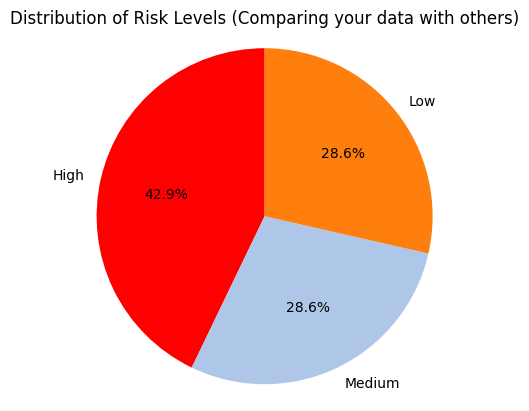

In [58]:
run_health_assessment()